##Python Tutorial With Google Colab

This tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for cs231n. It was adapted as a Jupyter notebook for Stanford cs228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335). This version has been adapted for Colab by Kevin Zakka for the Spring 2020 edition of [cs231n](https://cs231n.github.io/). It runs Python3 by default.

Yifeng Zhu made modifications for ECE491/591-Fall 2022.

Vikas Dhiman made modifications for ECE490/590 Spring 2022.

##Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.


## Python for C programmers

Python is simpler programming language than others like C or C++. It has only a few [builtin](https://docs.python.org/3/library/functions.html#built-in-funcs) [concepts](https://docs.python.org/3/library/constants.html#built-in-consts) and a [large standard](https://docs.python.org/3/tutorial/stdlib.html) [library](https://docs.python.org/3/tutorial/stdlib2.html).


### Differences
1. C is compiled vs Python is intepreted (Python executable converts each line to machine instructions one statement at a time.)
2. C is statically typed vs Python is dynamically typed. 
3. C does not have memory management. You have to `free()` the memory yourself after you `malloc()` the memory. Python manages memory using reference counting.  When number of references to a memory location go to zero, the memory is freed. 
4. C variable scope is defined by curly braces. Python variable scope is only defined by Classes, functions and modules.
5. C does not have operator overloading, which means that you cannot define the meaning of +, -, * for your own classes. Python can.


# In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## A Brief Note on Colab and Jupyter notebooks

As of Janurary 1, 2020, Python has [officially dropped support](https://www.python.org/doc/sunset-python-2/) for `python2`. We'll be using Python 3.7 for this iteration of the course. You can check your Python version at the command line by running `python --version` or `python3 --version`. In Colab, we can enforce the Python version by clicking `Runtime -> Change Runtime Type` and selecting `python3`. Note that as of April 2020, Colab uses Python 3.6.9 which should run everything without any errors.

Colab is a Google hosted version of [Jupyter notebooks](https://docs.jupyter.org/en/latest/). Jupyter notebooks are great for teaching, presentations and trying out small portions of code, but they do not work well with multi-file projects. We enourage you to grow out of notebooks use the tool most appropriate for the job.


## Jupyter notebooks and bash

Jupyter notebooks contain "cells". "Text cells" are rendered as text. "Code cells" are executed. All the stdout (standard output) and stderr (standard error) output is saved in the next cell called the "Output cell". The "Output cell" stores  the output untill it is explicity cleared or over written. 

We will come to Python code in the next section. Let start with running bash commands in Jupyter notebooks.

Any command starting with a "!" is passed to the shell like bash.

In [ ]:
!echo $SHELL

You can run any bash command and linux command that are provided by the OS that is running the Jupyter notebook.

In [ ]:
!uname -a

What is your username?

In [ ]:
!id

You can delete the entire operating system using `rm -rf /`, but everything  is running inside a container so you won't hurt anyone. You might have to reload the Colab notebook.

Recall the linux commands from ECE177: [one page quick reference on the linux command line](https://files.fosswire.com/2007/08/fwunixref.pdf)

In [ ]:
!python --version

In [ ]:
!ls

In [ ]:
!pwd

In [ ]:
!mkdir test

You cannot use ! to navigate the file systems. In stead, you need to use % to change the directory.

In [ ]:
%cd test

In [ ]:
!pwd

<font color='red'>Exercise 1: write a command to list all files in the current directory.</font> 

In [ ]:
# Exercise 1 Your answer:


<font color='red'>Exercise 2: What is the difference between "!cd directory" and "%cd directory"?</font> 

Exercise 2: Your Anwser: 

## Running C programs in Jupyter notebooks

There are versions of Jupyter Notebooks where you can run C programs line by line. For example, checkout the [xeus-cling project](https://mybinder.org/v2/gh/jupyter-xeus/xeus-cling/stable?filepath=notebooks/xcpp.ipynb). Google does not support that however, so we are going to use the [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) : `%%witefile filename` to write C program to file which can then be compiled and executed.



In [ ]:
%%writefile helloworld.c
#include <stdio.h>
int main() {
  printf("hello world from C!\n");
}

When you start a "cell" with magic command `%%writefile <filename>`, the remaining contents of the cell get written into a the file with given filename. You can then manipulate the file like you would have in a terminal.

In [ ]:
!gcc helloworld.c -o helloworld && ./helloworld

##Basics of Python

Python is a high-level, dynamically typed programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1: 
        return arr
    pivot = arr[len(arr) // 2] # Split arr in half
    left = [x for x in arr if x < pivot] # Take elements smaller than pivot
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot] # Take elements greater than pivot
    return quicksort(left) + middle + quicksort(right) # Concatenate lists

print(quicksort([3,6,8,10,1,2,1]))

#### Hello world in Python
Print the hello world! Unlike C, Python does not "need" a main function to run. All the lines are executed one by one. Semicolons are optional.

In [ ]:
print("hello world from Python!")

You can run this single from a python file.

In [ ]:
%%writefile helloworld.py
print("hello world from Python file!")

You can run any file using the python executable.

In [ ]:
!python3 helloworld.py

Jupyter cells automatically print the last expression to stdout. Specifically, the last statement must be an [expression statement](https://docs.python.org/3/reference/simple_stmts.html#expression-statements). 

For example, you do not need the `print()` function to print "hello world!" from Jupyter cell.

In [ ]:
"Hello world from Jupyter cell!"

You can suppress the output by making the last statement, not an "expression statement". You can do it by assining this to another variable, for example.

In [ ]:
x = "Hello world from Jupyter cell!" # this will not be printed by Juputer cell

Just listing the variables in the last line of the Code cell, prints them to the output.

In [ ]:
x = "Hello world from Jupyter cell!"
x # This will be printed

Just like Matlab, you can suppress the output of a variable by using semicolon.

In [ ]:
x = "Hello world from Jupyter cell!"
x; # This will NOT be printed

Remember, this printing without `print()` function is a feature of Jupyter notebooks, not Python language.

###Basic data types

Simple data types in Python:
* **int** (integers): numbers without a decimal ( Integers have unlimited precision. )
* **float** (floating point numbers): numbers with a decimal (  Floating point numbers are usually implemented using double in C; information about the precision and internal representation of floating point numbers for the machine on which your program is running is available in `sys.float_info`. )
* **bool** (booleans): True or False values
* **str** (strings): usually to represent text. However, anything that is wrapped in quotes (single or double) is treated as a string.

In [ ]:
import sys
sys.float_info

####Numbers

Integers and floats work as you would expect from other languages:

In [ ]:
x = 3
(x, type(x))

In [ ]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation DIFFERENT from C

In [ ]:
x += 1    # x = x + 1 
print(x)
x *= 2    # x = x * 2
print(x)

In [ ]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<font color='red'>Exercise 3: why cannot we get exact result?</font> Hints: https://www.h-schmidt.net/FloatConverter/IEEE754.html
https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html



In [ ]:
0.2 + 0.1

Note that unlike many languages, **Python does not have unary increment** (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.8/library/stdtypes.html#numeric-types-int-float-long-complex).

####Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [ ]:
t = True; f = False
print(type(t))

Now we let's look at the operations:

In [ ]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

####Strings

In [ ]:
hello = 'hello'   # String literals can use single quotes
doesnt = 'doesn\'t'  # use \' to escape the single quote...
doesnt = "doesn't"   # or use double quotes; it does not matter
yestheysaid = '"Yes," they said.'
great = """Python
also has triple quotes
which can internally contain 
newlines, 'single quotes' and "double quotes". 
Triple quotes are often used for documentation
and multi-line comments.
"""
print(doesnt)
print(yestheysaid)
print(hello)
print(len(hello))

In [ ]:
hw = hello + ', ' + world  # String concatenation
hw

Strings can be concatenated (glued together) with the + operator, and repeated with *:

In [ ]:
3 * 'un' + 'ium'

In [ ]:
hw12 = '{:s} {} {:d}'.format(hello, world, 12)  # string formatting
hw12

String formatting has its [own mini language](https://docs.python.org/3.8/library/string.html#formatspec).

In [ ]:
hw12 = '%s %s %d' % (hello, world, 12) # C-style string formatting using % operator
hw12

Since Python 3.8, the dominant way to format strings is to use [f-string](https://docs.python.org/3/glossary.html#term-f-string)

In [ ]:
hello = "Hell'o"
world = 'World"'
i = 12
hw12 = F'{hello:s} {world} {i:d}'# string formatting using f-strings
hw12

In [ ]:
hw12 = hello + world + str(12)
print(hw12)

In [ ]:
hw12 = hello + ' ' + world + ' ' + str(3.1415)
print(hw12)

In [ ]:
# Yes you can use emojis (unicode support)
f"{hello} 😀 😃 😄 😁 😆 {i:d} emojies"

Or you can use [Unicode names for emojies](https://docs.python.org/3/howto/unicode.html)

In [ ]:
"\N{GRINNING FACE}"

String objects have a bunch of useful methods; for example:

In [ ]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another

In [ ]:
s = 'hello'
s = s.upper()
print(s)

You can ask for help on any python function, object or type using "?"

In [ ]:
 # a jupyter notebook feature, not python
s.upper?

In [ ]:
help(s.upper) # Some as s.upper? but a python feature

In [ ]:
dir(s) # List all the functions available on a string object

**Whitespace**: any nonprinting character, such as spaces, tabs, and end-of-line symbols

In [ ]:
print("ECE 491/591\n\tDeep Learning\nis fun!")

In [ ]:
print('  w\to\tr  l\nd '.strip())  # Strip leading and trailing whitespace

In [ ]:
print('  world '.rstrip())  # Strip trailing whitespace

In [ ]:
print('  world '.lstrip())  # Strip leading whitespace

You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

#### Difference from C
C is statically typed vs Python is dynamically typed. You can change the type of a variable from one line to another.

In [ ]:
x = 1
print("1. Type of x = ", type(x))
x = "str"
print("2. Type of x = ", type(x))

####Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [ ]:
lst = [1, 2, 3, 4, 5]
print(lst)

**Index Positions Start at 0, Not 1**

In [ ]:
lst[0]

In [ ]:
xs = [1, 2, 3, 'hello', [4, 5, 6]]    # Create a list
print(xs)
print('First element of the array: ', xs[0])  # Index to the list starts with 0
print('Last element of the array: ', xs[4])
print(xs[4][1])

In [ ]:
# Negative indices count from the end of the list; 
print(xs[-1])     # Index -1 returns the last item in the list
print(xs[-2])     # Index -2 returns the second item from the end of the list

In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

In [ ]:
print(xs)
x = xs.pop()     # Remove and return the last element of the list
print(x)
print(xs)

In [ ]:
xs.insert(1, "new item") # Insert the "new item" at the index 1
print(xs) 

In [ ]:
xs.remove("foo") # Removing an item by value
print(xs)

As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

In [ ]:
colors = ["Red", "Green", "White", "Black"]
# Print the first color in the above list
print(colors[0])
# Print the last color in the above list
print(colors[-1])
# Append "Blue" to the above list
colors.append('Blue')
print(colors)
# Remove "Green" from the above list
colors.remove('Green')
print(colors)

<font color='red'>Exercise 4: Find the length of a list. </font>

In [ ]:
len(colors)
len(colors)

<font color='red'> In-class Excercises: What is the difference between sorted(colors) and colors.sort()? </font>

In [ ]:
colors = sorted(colors)

In [ ]:
colors.sort()

####Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

* aList[**start:stop:step**]
* aList[**start:stop**]

The default for **start** is none or 0. 

The default **stop** is the end of your data structure. 

Using a positive number references from the first element, a negative number references from last element in your structure.

In [ ]:
# nums = range(5) # Python 2, but error in Python 3
nums = list(range(5))    # range is a built-in function that creates a list of integers
nums = [0, 1, 2, 3, 4]
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9]  # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

In [ ]:
lst = list(range(0,100,10))
print(lst)

In [ ]:
# Print everything except the last three elements
print(lst[:-3])

In [ ]:
# Print everything with odd indices
print(lst[::2])

In [ ]:
# Print everything with even indices
print(lst[1::2])

In [ ]:
# Print everything in reversed order
print(lst[::-1])

**<font color='red'> In-class Excercises: Select [6,5,4] from the following list. </Font>**

In [ ]:
A = list(range(1,10,1)) # start,stop,step
print(A)

In [ ]:
# Your Answer:
A[5:2:-1]

In [ ]:
A[-4:2:-1]

In [ ]:
A[-4:-7:-1]

####Loops

You can loop over the elements of a list like this:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
  print(animal)

##### Differences from C
Unlike C there are no braces for start and end of the for loop. Instead of braces, we have a compbination of ":" colon and indentation. Unlike C, indentation is mandatory in Python.

If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx, animal))

#### Exercise 

Write first 20 elements of fibonacci series: $f_0 = 0$, $f_1 = 1$, and $f_n = f_{n-1} + f_{n-2}$ for all $n \ge 2$.

In [ ]:
# Fibonacci series
### START SOLUTION
fib = [0, 1]
for i in range(2, 18):
  fib.append( fib[i-1] + fib[i-2] )
print(fib)
### END SOLUTION

#### Copying a list

To copy a list, you can make a slice that includes the entire original list
by omitting the first index and the second index ([:]). This tells Python to
make a slice that starts at the first item and ends with the last item, producing
a copy of the entire list.

In [ ]:
a = [1, 2, 3, 4, 5]
b = a[:]  # copying the list
# b = a.copy() # <- preferred way
c = a     # This doesn't copy the list!

a.append('x') # a = [1, 2, 3, 4, 5, 'x']
b.append('y') # b = [1, 2, 3, 4, 5, 'y']
c.append('z') # c = [1, 2, 3, 4, 5, 'x', 'z']

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('a = ', a)

####List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums: # Don't forget the colon
    squares.append(x ** 2)
print(squares)

You can make this code simpler using a list comprehension:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

List comprehensions can also contain conditions:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if (x % 2 == 0 and x <=2)]
print(even_squares)

####Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
key = 'cat'
print(d[key])
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

Adding a new key-value pair

In [ ]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])     # Prints "wet"

d['elephant'] = 'heavy'  # Set an entry in a dictionary
print(d['elephant'])     # Prints "heavy"

Looping through a dictionary

In [ ]:
for key, value in d.items():
  print('key = ', key, '\t value = ', value)

In [ ]:
for key in d.keys():
  print('key = ', key, '\tvalue = ', d[key])

In [ ]:
for key in sorted(d.keys()):  # sorting the key
  print('key = ', key, '\t\tvalue = ', d[key])

In [ ]:
for value in sorted(d.values()):  # print all values
  print('value = ', value)

In [ ]:
print('monkey' in d)

# print(d['monkey'])  # KeyError: 'monkey' not a key of d

For dictionaries, we can use the get() method to set a default value that will be returned if the requested key doesn’t exist.

In [ ]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

Removing a key-value pair

In [ ]:
del d['fish']        # Remove an element from a dictionary

# Be aware that the deleted key-value pair is removed permanently.
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

####Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [ ]:
animals = {'cat', 'dog', 'cat'}
animals_lst = ['cat', 'dog', 'cat']

print(len(animals))       
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


In [ ]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

In [ ]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       

_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx, animal))

Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

In [ ]:
import math
print(math.sqrt(2.0))

####Tuples

A tuple is an (immutable) ordered list of values. Python refers to values that cannot change as immutable, and an immutable list is called a tuple.

In [ ]:
dimensions = (800, 600)
print(dimensions[0])
print(dimensions[1])

Note that comma creates a tuple not parantheses. Always use parantheses to increase readability.

In [ ]:
dimensions = 800, 600
print(dimensions[0])
print(dimensions[1])

In [ ]:
dimensions[0] = 1000  # this will return error 

A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

Any sequence (list, tuple, set) can be _unpacked_ into individual variables.

In [ ]:
dimensionx, dimensiony = dimensions

In [ ]:
x, y, z = [1, 2, 3] # Lists can be used for Multiple assignment 
print(x, y, z)

In [ ]:
x, y, *rest = range(10) # Lists can be used for Multiple assignment 
x, y, rest

In [ ]:
x, y, z = 1, 2, 3  # Tuples can be used for Multiple assignment 
print(x, y, z)

### Flow Control

In [ ]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

In [ ]:
for x in "banana": # string is also a sequence type
  print(x)

In [ ]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  if x == "banana":
    break
  print(x)    

In [ ]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  if x == "banana":
    continue
  print(x)

In [ ]:
# Shows while loop. Do not use this style though, prefer for loop. 
# This style is considered not Pythonic
# https://peps.python.org/pep-0008/
idx = 0
while (idx < len(fruits)):
  print(fruits[idx])
  idx += 1

In [ ]:
age = 19
if age >= 18:
  print("You are old enough to vote!")
else:
  print("Sorry, you are too young to vote.")

In [ ]:
age = 12
if age < 4:
  price = 0
elif age < 18:
  price = 25
else:
  price = 40

print(f"Your admission cost is ${price}.")

### Differences from C

There is no `do {} while()` in Python. 

###Functions

Python functions are defined using the `def` keyword. For example:

In [ ]:
def sum2(a, b=4, c=8): # Making the argument b and c optional
  return a + b + c, a*b*c

In [ ]:
sum2(1, c=5)

In [ ]:
sum_, prod_ = sum2(1, c=5)

In [ ]:
prod_

In [ ]:
def sign(x, y=100):
  if x > 0:
    return 'positive', 123
  elif x < 0:
    return 'negative', 123
  else:
    return 'zero', 123

for x in [-1, 0, 1]:
  v1, _ = sign(x)
  print(v1)

We will often define functions to take [optional keyword](https://docs.python.org/3/glossary.html#term-keyword-argument) arguments, like this:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Modifing a list in a function

When you pass a list to a function, the function can modify the list.

In [ ]:
def fun(list):
  list.append('new item')

a = [1, 2, 3]
fun(a)
print(a)

If you want to prevent a function from modifying a list, you can send a copy of a list to the function

In [ ]:
def fun(lst):
  lst.append('new item')

a = [1, 2, 3]
# Preventing a Function from Modifying a List
fun(a[:]) # The slice notation [:] makes a copy of the list
# fun(a.copy()) 
print(a)

**<font color='red'> In-class Excercises </Font>**

In [ ]:
# Write a function named "first_last" that returns a list that contains only the first and the last element of a given list 
def first_last(a):
  return a[0::len(a)-1]

first_last([1, 2, 3, 4, 5])



**Scope**: The LEGB scope lookup rule. When a variable is referenced, Python searches for it in
this order: in the local scope, in any enclosing functions’ local scopes, in the global scope, and finally
in the built-in scope. The first occurrence wins. The place in your code where a variable is assigned
usually determines its scope. In Python 3, nonlocal declarations can also force names to be mapped
to enclosing function scopes, whether assigned or not.

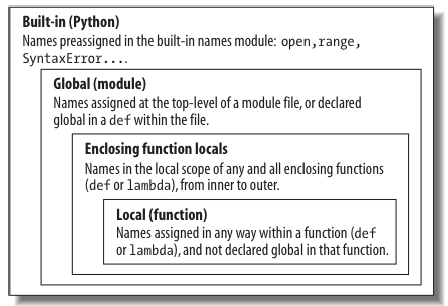

In [ ]:
# Global scope
X = 99 # X and func assigned in module: global

def func(Y): # Y and Z assigned in function: locals
  # Local scope
  Z = X + Y # X is a global
  return Z

func(1) # func in module: result=100

In [ ]:
X = 99 # Global scope name: not used

def f1():
  X = 88 # Enclosing def local
  def f2():
    print(X) # Reference made in nested def
  f2()

f1() # Prints 88: enclosing def local
print(X)

In [ ]:
X = 99 # Global X

def func():
  X = 88 # Local X: hides global

func()
print(X) # Prints 88: unchanged

The assignment within the function creates a local X that is a completely different
variable from the global X in the module outside the function.

In [ ]:
X = 99 # Global X

def func():
  global X
  X = 88 # Local X: hides global

func()
print(X) # Prints 88: unchanged

### Asterisks in Python

In [ ]:
3 * 5

In [ ]:
3 ** 5

In [ ]:
# Using * to unpack iterables into a list/tuple
numbers = [2, 1, 3, 4, 7]
more_numbers = [*numbers, 11, 18]
print(*more_numbers, sep=', ')

In [ ]:
# Unpack a dictionary
date_info = {'year': "2020", 'month': "01", 'day': "01"}
filename = "{year}-{month}-{day}.txt".format(**date_info)
print(filename)

### zip

The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

In [ ]:
languages = ['Java', 'Python', 'JavaScript']
versions = [14, 3, 6]

result = zip(languages, versions)
print(list(result))

In [ ]:
for (x, y) in zip(languages, versions): # pairs of items pulled from  two lists
  print(x, y)

In [ ]:
keys = ['spam', 'eggs', 'toast']
vals = [1, 3, 5]

D2 = {}
for (k, v) in zip(keys, vals): 
  D2[k] = v

D2

zip function is more general than this example suggests. For instance,
it accepts any type of sequence (really, any iterable object, including files), and
it accepts more than two arguments. With three arguments, as in the following example,
it builds a list of three-item tuples with items from each sequence, essentially projecting
by columns (technically, we get an N-ary tuple for N arguments):

In [ ]:
T1, T2, T3 = (1,2,3), (4,5,6), (7,8,9)
list(zip(T1, T2, T3))

The * operator can be used in conjunction with zip() to unzip the list.

In [ ]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5]

result = zip(coordinate, value)
result_list = list(result)
print(result_list)

c, v =  zip(*result_list)
print('c =', c)
print('v =', v)

###Classes

#### Defining a Class

The syntax for defining classes in Python is straightforward:

In [ ]:
class Addition: 
	# first = 0
	# second = 0
	answer = 0
	
	# parameterized constructor 
	def __init__(self, first, second): 
		self.first = first 
		self.second = second 

	def display(self): 
		print("First number = " + str(self.first)) 
		print("Second number = " + str(self.second)) 
		print("Addition of two numbers = " + str(self.answer)) 

	def calculate(self): 
		self.answer = self.first + self.second 
	
# creating object of the class 
# this will invoke parameterized constructor 
obj = Addition(1000, 2000) 

# perform Addition 
obj.calculate() 

# display result 
obj.display() 


In [ ]:
class Person:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def getName(self):
        return self.name 

    # To check if this person is an employee 
    def isEmployee(self): 
        return False

# Making an instance from a class
g = Person('Fred')  # Construct an instance of the Greeter class

# Accessing attributes
print(g.name)

# Calling methods
print(g.getName())          

* The **self** parameter is required in the method definition, and it must come first before the other parameters. It must be included in the definition because when Python calls this method later (to create an instance), the method call will automatically pass the self argument.
* Every method call associated with an instance automatically passes **self**, which is a reference to the instance itself; it gives the individual instance access to the attributes and methods in the class.

In a class, the implicit behavior of passing the object as the first argument is avoided if a method is declared as static, as shown in the following example.

In [ ]:
class A(object):

    @staticmethod
    def stat_meth():
        print("Look no self was passed")

a = A()
a.stat_meth()

#### Inheritance

Inheritance is the capability of one class to derive or inherit the properties from another class. The benefits of inheritance are:

* It represents real-world relationships well.
* It provides reusability of a code. We don’t have to write the same code again and again. Also, it allows us to add more features to a class without modifying it.
* It is transitive in nature, which means that if class B inherits from another class A, then all the subclasses of B would automatically inherit from class A.

In [ ]:
# Inherited or Subclass (Note Person in bracket) 
class Employee(Person): 
   
    # Constructor
    def __init__(self, name, year):
        self.years = year  # Create an instance variable
        super().__init__(name)

    # Overriding Methods from the Parent Class
    def isEmployee(self): 
        return True
   
# Driver code 
emp = Person("Geek1")  # An Object of Person 
print(emp.getName(), emp.isEmployee()) 
   
emp = Employee("Geek2", 20) # An Object of Employee 
print(emp.getName(), emp.isEmployee()) 

## Iterators

#### An iterator is an object that can be iterated upon, meaning that you can traverse through all the values.

In [ ]:
mytuple = ("apple", "banana", "cherry")
myit = iter(mytuple) # define
print(type(myit))
print(next(myit)) # apple
print(next(myit)) # banana
print(next(myit)) # cherry
print(next(myit)) # error

#### Strings, lists, tuples, dictionaries, and sets are all iterable objects.

In [ ]:
mystr = "banana"
myit = iter(mystr)

print(next(myit))
print(next(myit))
print(next(myit))
print(next(myit))
print(next(myit))
print(next(myit))

#### Looping Through an Iterator

C-style approach

In [ ]:
mytuple = ("apple", "banana", "cherry")
i = 0
while (i < len(mytuple)): 
    print(mytuple[i])
    i += 1

A better approach

In [ ]:
mytuple = ("apple", "banana", "cherry")

print(mytuple)

for idx, val in enumerate(mytuple):
  print(idx, val)

In [ ]:
mytuple = ("apple", "banana", "cherry")

print(mytuple)

for val in mytuple:
  print(val)

In [ ]:
mystr = "banana"

for x in mystr:
  print(x)

In [ ]:
# Iterating over dictionary 
d = dict()  
d['xyz'] = 123
d['abc'] = 345
for i in d : 
    # print("%s  %d" %(i, d[i]))
    print("{}\t{}".format(i, d[i]))

#### Create an Iterator


To create an object/class as an iterator, you have to implement the methods \_\_iter\_\_() and \_\_next\_\_() to your object.


*   **\_\_iter\_\_** method that is called on initialization of an iterator. This should return an object that has a \_\_next\_\_ method.
*   **\_\_next\_\_** should return the next value for the iterable. This method should raise a **StopIteration** to signal the end of the iteration.



In [ ]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self

  def __next__(self):
    x = self.a
    self.a += 1
    return x

myclass = MyNumbers()
myiter = iter(myclass)

print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))

#for x in myiter:
#  print(x)


Stop after 10 iterations by using the StopIteration statement

In [ ]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self

  def __next__(self):
    if self.a <= 10:
      x = self.a
      self.a += 1
      return x
    else:
      raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
  print(x)

#### zip function
Combine mulitple iterator

In [ ]:
# Two separate lists 
thing = ["Apple", "Audi", "Pasta", "dog", "UMAINE"] 
category = ["fruit", "car",  "food", "animal"] 
  
# Combining lists and printing 
for t, c in zip(thing, category): 
    print("{} is {}".format(t, c))

Use "*" operator to unzip

In [ ]:
l1,l2 = zip(*[('Apple', 'fruit'),  
              ('Audi', 'car'),  
              ('Pasta', 'food')  
           ]) 
  
# Printing unzipped lists       
print(l1) 
print(l2) 

## yield vs return

Unlike normal functions that return a value and exit, **generator functions** automatically
suspend and resume their execution and state around the point of value generation.
Because of that, they are often a useful alternative to both computing an entire series
of values up front and manually saving and restoring state in classes. Because the state
that generator functions retain when they are suspended includes their entire local
scope, their local variables retain information and make it available when the functions
are resumed.


The chief code difference between generator and normal functions is that a generator
**yields** a value, rather than returning one—the yield statement suspends the function
and sends a value back to the caller, but retains enough state to enable the function to
resume from where it left off. When resumed, the function continues execution immediately
after the last yield run. From the function’s perspective, this allows its code
to produce a series of values over time, rather than computing them all at once and
sending them back in something like a list.

In [ ]:
def simpleGeneratorFun(): 
    x = 5
    # print(x)
    yield 1 + x

    x = 2*x
    #print(x)
    yield 1 + x

    
    x = 2*x
    #print(x)
    yield 1 + x

In [ ]:
simpleGeneratorFun()

the next(X) built-in calls an object’s
X.__next__() method for us:

In [ ]:
x = simpleGeneratorFun()
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
list(simpleGeneratorFun())

In [ ]:
# Driver code to check above generator function 
# simpleGeneratorFun()
list(simpleGeneratorFun())

#for value in simpleGeneratorFun():  
#    print(value) 

Yield are used in Python generators. A generator function is defined like a normal function, but whenever it needs to generate a value, it does so with the yield keyword rather than return. If the body of a def contains yield, the function automatically becomes a generator function.

In [ ]:
def nextSquare(): 
    i = 1; 
  
    # An Infinite loop to generate squares  
    while True: 
        yield i*i                 
        i += 1  # Next execution resumes  
                # from this point      
  
# Driver code to test above generator  
# function 
for num in nextSquare(): 
    if num > 100: 
         break    
    print(num) 

## Modules and Packages

In [ ]:
!pip install import-ipynb

In [ ]:
import import_ipynb
import myModule

print(myModule.s)


In [ ]:
import sys
import os

dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)